# Importing libraries


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [2]:
dataset = pd.read_csv('blindchess_dataset.csv')

# Preview Data

In [3]:
dataset.head()

,Moves,Rating
0,4,700
1,5,800
2,6,803
3,6,901
4,6,850


In [4]:
dataset.shape


(420, 2)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
dataset['Moves']=le.fit_transform(dataset['Moves'])
dataset['Rating']=le.fit_transform(dataset['Rating'])
dataset

,Moves,Rating
0,0,0
1,1,1
2,2,2
3,2,7
4,2,4
...,...,...
415,42,133
416,42,138
417,42,141
418,42,140


dataset.describe().T

In [7]:
dataset.isnull().sum()

Moves     0
Rating    0
dtype: int64

# Observations:
1. There are a total 5110 records and 9 features in our dataset.
2. Each feature can be either of integer or float dataype.
3. Some features like BMI have zero values which represent data is missing.
4. There are zero NaN values in the dataset.
5. In the stroke column, 1 represents stroke is possible and 0 represents stroke is not possible.


# Data Visualisation

<AxesSubplot:xlabel='Rating', ylabel='count'>

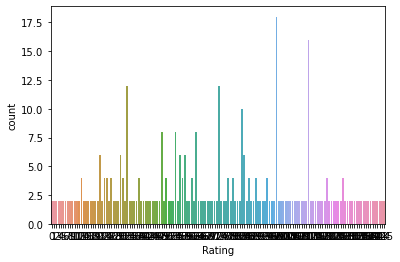

In [8]:
sns.countplot(x = 'Rating',data = dataset)

### Histogram of each feature

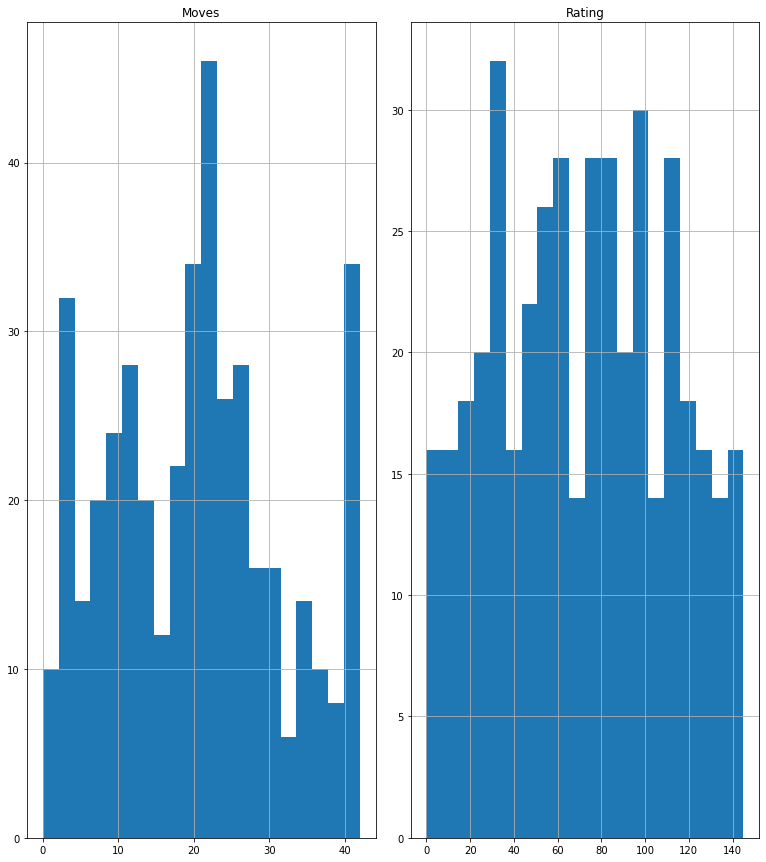

In [9]:
import itertools
col = dataset.columns[:2]
plt.subplots(figsize = (20, 15))
length = len(col)
for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

### Heat Map

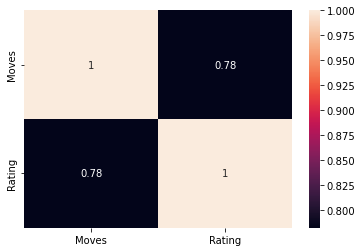

In [10]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

# Data Pre-processing

In [11]:
new_dataset = dataset

In [12]:
new_dataset[["Moves", "Rating"]] = new_dataset[["Moves", "Rating"]].replace(0, np.NaN) 

In [13]:
new_dataset.isnull().sum()

Moves     2
Rating    2
dtype: int64

In [14]:
new_dataset["Moves"].fillna(new_dataset["Moves"].mean(), inplace = True)
new_dataset["Rating"].fillna(new_dataset["Rating"].mean(), inplace = True)
convert_dict = {'Moves': int,
                'Rating': int
               }
  
new_dataset = new_dataset.astype(convert_dict)

In [15]:
new_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Moves,420.0,20.300000,11.328486,1.0,11.0,20.0,27.0,42.0
Rating,420.0,71.780952,38.596123,1.0,38.0,73.0,102.0,145.0


In [16]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range = (0, 1))
# dataset_scaled = sc.fit_transform(new_dataset)

In [17]:
dataset_scaled = new_dataset

In [18]:
X = dataset_scaled.iloc[:, [0]].values
Y = dataset_scaled.iloc[:, 1].values
Y

array([ 71,   1,   2,   7,   4,   8,  10,   6,  13,   9,  12,  44,  26,
        36,  13,  58,  55, 116,  72,   3,  11,  57,  19,  14,  27,  34,
        29,  33,  41,  60,   5,  24,  35,  51,  47,  50,  28,  31,  26,
        15,  52,  89,  69,  56,  38,  37,  81,  75,  33,  59,  43,  40,
        96, 107,  30,  32,  30,  42,  21, 120,  30,  21,  24,  20, 104,
        95,  65,  48,  31,  63,  80,  45,  61,  39,  97,  49,  85,  33,
        62, 120, 121,  82, 127,  56,  77,  63,  58,  48,  23,  18,  33,
       109,  89,  21,  56,  53,  91,  90,  48,  98,  33,  63,  16,  66,
        54,  61,  46,  76, 126,  83,  73,  79,  25,  84,  73,  87,  79,
        70,  17,  22,  57,  23,  92,  68,  98,  83,  73,  84,  73,  33,
        54,  99, 106,  88,  71,  73,  54,  38,  94,  93,  84,  74,  86,
        77, 125, 102, 112,  83,  58,  83,  54,  78, 112,  50,  63, 101,
       103,  86, 122,  48,  67,  98, 112,  64, 105,  94, 108, 110, 111,
        98,  73, 131,  83, 128, 119, 100,  98, 123, 112, 112, 11

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.50, random_state = 42, stratify = new_dataset['Rating'] )

In [20]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (210, 1)
X_test shape: (210, 1)
Y_train shape: (210,)
Y_test shape: (210,)


# Data modeling

## Logistic regression algorithm 

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

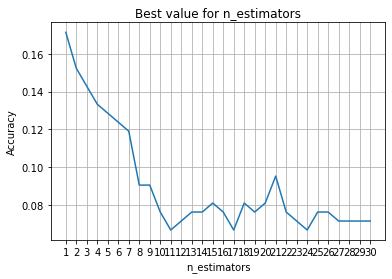

Highest value is given by ->  0.17142857142857143


In [22]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value is given by -> ',acc.values.max())

## K-nearest neighbour algorithm

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

## Vector classifier algorithm

In [24]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

## Naive Bayes algorithm

In [25]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

## Decision tree algorithm

In [26]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

## Random Forest algorithm

In [27]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

### Predictions on dataset

In [32]:
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)
X_test
#Y_pred_knn

array([[ 7],
       [26],
       [42],
       [22],
       [20],
       [23],
       [ 9],
       [11],
       [31],
       [13],
       [ 4],
       [35],
       [42],
       [24],
       [ 5],
       [35],
       [24],
       [26],
       [13],
       [19],
       [24],
       [23],
       [29],
       [10],
       [21],
       [ 7],
       [25],
       [26],
       [27],
       [13],
       [14],
       [ 7],
       [23],
       [ 5],
       [21],
       [42],
       [ 4],
       [24],
       [17],
       [32],
       [19],
       [41],
       [21],
       [ 4],
       [ 3],
       [25],
       [38],
       [14],
       [26],
       [22],
       [19],
       [42],
       [26],
       [18],
       [ 6],
       [42],
       [ 4],
       [11],
       [42],
       [28],
       [19],
       [26],
       [26],
       [23],
       [ 4],
       [ 4],
       [19],
       [13],
       [19],
       [23],
       [ 2],
       [14],
       [ 5],
       [33],
       [20],
       [22],
       [19],

# Model Evaluation

In [207]:
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [209]:
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Vector Classifier algorithm: " + str(accuracy_svc * 100))
print("Naive Bayes algorithm: " + str(accuracy_nb * 100))
print("Decision tree algorithm: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 7.142857142857142
K Nearest neighbors: 6.666666666666667
Vector Classifier algorithm: 8.095238095238095
Naive Bayes algorithm: 17.142857142857142
Decision tree algorithm: 16.19047619047619
Random Forest: 16.666666666666664


In [210]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

<AxesSubplot:>

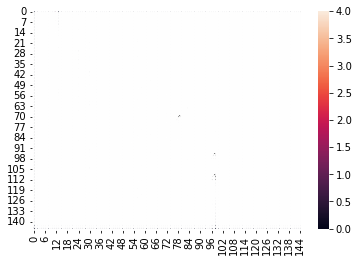

In [211]:
sns.heatmap(pd.DataFrame(cm), annot=True)

In [212]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.08      1.00      0.15         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00    